# Cancelaciones OTP
¿Cómo varı́a la cantidad de vuelos cancelados por mes a través de los años? ¿Está
relacionada con la magnitud de los retrasos y el OTP? ¿Se puede predecir el delay
solamente con las cancelaciones?

¿Se pueden utilizar las cancelaciones como un indicador de performance?

## Build

In [1]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

Submodule 'eigen-git-mirror' (https://github.com/eigenteam/eigen-git-mirror) registered for path 'eigen'
Submodule 'pybind11' (https://github.com/pybind/pybind11) registered for path 'pybind11'
Cloning into '/home/nicolas/dev/tp3/eigen'...
Cloning into '/home/nicolas/dev/tp3/pybind11'...
Submodule path 'eigen': checked out 'cf794d3b741a6278df169e58461f8529f43bce5d'
Submodule path 'pybind11': checked out 'a6355b00f84d997a9ddcf209b6464447432be78a'
-- The C compiler identification is GNU 9.1.0
-- The CXX compiler identification is GNU 9.1.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile featur

## Imports

In [25]:
import predict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def otp(dataframe, groups):
    total = dataframe.groupby(groups).size()
    delayed = dataframe[dataframe['ArrDelay']>15].groupby(groups).size()
    return delayed/total

In [27]:
def cancels(dataframe, groups):
    return dataframe[dataframe['Cancelled'] != 0].groupby(groups).size()

    

In [4]:
# Ejemplo
x= [1,2]
y = [1,1]
def cuadratica(x):
    return np.array([x*x,x,1]);

cml = predict.CML(cuadratica,3)
res =cml.fit(x,y)



## Experimentacion

In [11]:
csvfile="2008.csv" 
root="../data/"
df = pd.read_csv(root+csvfile)


In [16]:
motp = otp(df, ['Month'])
mcan = cancels(df, ['Month'])


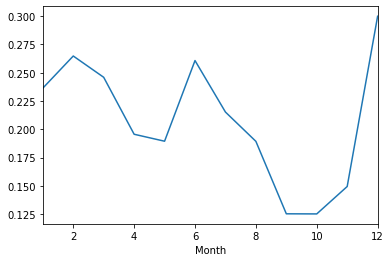

In [17]:
motp.plot()

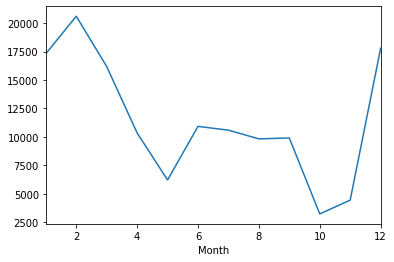

In [18]:
mcan.plot()

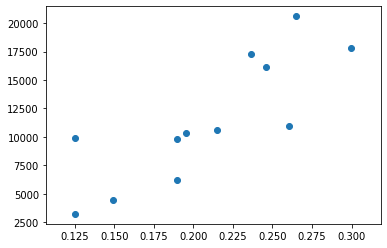

In [21]:
plt.scatter(motp, mcan)

### Cancelaciones mensuales
¿Cómo varı́a la cantidad de vuelos cancelados por mes a través de los años?

In [28]:
cans = pd.Series([])
otps = pd.Series([])
files=[
    "1994.csv",
    "1995.csv",
    "1996.csv",
    "1997.csv",
    "1998.csv",
    "1999.csv",
    "2000.csv",
#    "2001.csv",
#    "2002.csv",
    "2003.csv",
    "2004.csv",
    "2005.csv",
    "2006.csv",
    "2007.csv",
    "2008.csv" 
]
root="../data/"
for file in files:
    frame = pd.read_csv(root+file)
    monthly_cancels = cancels(frame,['Year','Month'])
    monthly_otps = otp(frame,['Year','Month'])
    cans = pd.concat([cans, monthly_cancels])
    otps = pd.concat([otps, monthly_otps])

    


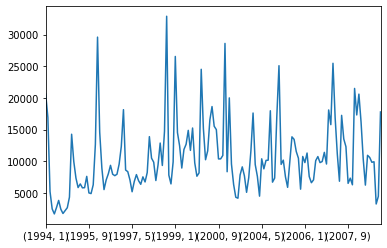

In [29]:
cans.plot()

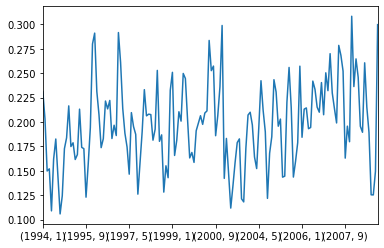

In [30]:
otps.plot()